# Recomendador de musicas utilizando dados da API Spotify

## Informações da API
https://developer.spotify.com/documentation/web-api

## tratamento e analises iniciais dos dados

In [213]:
import pandas as pd
import numpy as np

dfTotais = pd.read_csv('/content/drive/MyDrive/data_bases_alura/Dados_totais.csv')
dfGenres = pd.read_csv('/content/drive/MyDrive/data_bases_alura/data_by_genres.csv')
dfYear = pd.read_csv('/content/drive/MyDrive/data_bases_alura/data_by_year.csv')

In [214]:
dfTotais.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy  explicit                      id  instrumentalness  key  liveness  \
0   0.661         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1   0.806         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   
2   0.864         0  60a0Rd6pjrkxjPbaKzXjfq          0.000000    3    0.2090   
3   0.865         0  6ZOBP3NvffbU4SZcrnt1k6          0.000011   11    0.1680   
4   0.661         1  3yfqSUWxFvZELEM4PmlwIR          0.000000    5    0.0454   

   loudness  mode                 name  popularity  speechiness    tempo  \
0    -7.227     1               Yellow          84       0.0281  173.372   
1    -5.946     0          Ms. Jackson          80       0.2690   94.948   
2    -5.870     0           In the End          84       0.0584  105.143   
3    -5.708     0           Kryptonite          78       0.0286   99.009   
4    -4.244     0  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

# tratamento dos dados


In [215]:
dfTotais = dfTotais.drop(['explicit', 'key', 'mode', 'name'], axis=1)

In [216]:
dfTotais.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

   popularity  speechiness    tempo                  artists_song  
0          84       0.0281  173.372             Coldplay - Yellow  
1          80       0.2690   94.948         OutKast - Ms. Jackson  
2          84       0.0584  105.143      Linkin Park - In the End  
3          78       0.0286   99.009     3 Doors Down - Kryptonite  
4          80       0.0572  104.504  Eminem - The Real Slim Shady

In [217]:
dfTotais.isnull().sum().sum()

0

In [218]:
dfGenres =dfGenres.drop(['key', 'mode'], axis=1)

In [219]:
dfGenres.head(10)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   
2                   8-bit      0.762000      0.712000  1.151770e+05  0.818000   
3                      []      0.651417      0.529093  2.328809e+05  0.419146   
4              a cappella      0.676557      0.538961  1.906285e+05  0.316434   
5                abstract      0.459210      0.516167  3.431965e+05  0.442417   
6          abstract beats      0.342147      0.623000  2.299362e+05  0.527800   
7        abstract hip hop      0.243854      0.694571  2.318492e+05  0.646235   
8               accordeon      0.323000      0.588000  1.640000e+05  0.392000   
9               accordion      0.446125      0.624812  1.670616e+05  0.373437   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834  0.361600 -31.514333     0.040567   75.336500  0.103783   
1          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   
2          0.876000  0.126000  -9.180000     0.047000  133.444000  0.975000   
3          0.205309  0.218696 -12.288965     0.107872  112.857352  0.513604   
4          0.003003  0.172254 -12.479387     0.082851  112.110362  0.448249   
5          0.849667  0.118067 -15.472083     0.046517  127.885750  0.307325   
6          0.333603  0.099653  -7.918000     0.116373  112.413800  0.493507   
7          0.024231  0.168543  -7.349328     0.214258  108.244987  0.571391   
8          0.441000  0.079400 -14.899000     0.072700  109.131000  0.709000   
9          0.193738  0.160300 -14.487063     0.078537  112.872438  0.658688   

   popularity  
0   27.833333  
1   52.500000  
2   48.000000  
3   20.859882  
4   45.820071  
5   43.500000  
6   58.933333  
7   39.790702  
8   39.000000  
9   21.937500

In [220]:
dfYear =dfYear.drop(['key', 'mode'], axis=1)

no dataset de anos temos dados a partir de 1921, e no dataset de musica temos dados a partir de 2000, então vamos precisar tirar uma parte dos dados pra poder fazer o modelo com dados na mesma faixa de tempo

In [221]:
#filtrando os anos do dataset e resetando o index apos as remoções
dfYear = dfYear[dfYear['year']>=2000]
dfYear['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [222]:
dfYear.reset_index()

index  year  acousticness  danceability    duration_ms    energy  \
0      79  2000      0.289323      0.590918  242724.642638  0.625413   
1      80  2001      0.286842      0.583318  240307.796010  0.626986   
2      81  2002      0.282624      0.576160  239503.283000  0.641270   
3      82  2003      0.256471      0.575763  244670.575230  0.660165   
4      83  2004      0.280559      0.567680  237378.708037  0.648868   
5      84  2005      0.255764      0.572281  237229.588205  0.653209   
6      85  2006      0.279986      0.568230  234042.914359  0.650326   
7      86  2007      0.254081      0.563414  241049.962564  0.668305   
8      87  2008      0.249192      0.579193  240107.315601  0.671461   
9      88  2009      0.261929      0.564190  238140.013265  0.670749   
10     89  2010      0.242687      0.572488  242811.804563  0.681778   
11     90  2011      0.273183      0.552867  236998.787308  0.648301   
12     91  2012      0.249953      0.570882  245807.457584  0.656571   
13     92  2013      0.257488      0.571148  242267.661437  0.645597   
14     93  2014      0.249313      0.589948  233728.314713  0.648795   
15     94  2015      0.253952      0.593774  230029.046606  0.627064   
16     95  2016      0.284171      0.600202  221396.510295  0.592855   
17     96  2017      0.286099      0.612217  211115.696787  0.590421   
18     97  2018      0.267633      0.663500  206001.007133  0.602435   
19     98  2019      0.278299      0.644814  201024.788096  0.593224   
20     99  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0           0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1           0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2           0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
3           0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
4           0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   
5           0.090194  0.190082 -7.466159     0.093334  121.617967  0.532531   
6           0.077701  0.188289 -7.265501     0.085847  121.798615  0.520028   
7           0.072957  0.196127 -7.044536     0.084347  124.087516  0.516794   
8           0.063662  0.198431 -6.843804     0.077356  123.509934  0.527542   
9           0.075872  0.205252 -7.046015     0.085458  123.463808  0.507170   
10          0.082981  0.199701 -6.909904     0.081031  123.570215  0.520895   
11          0.103772  0.203309 -7.574986     0.087479  121.483997  0.472454   
12          0.085206  0.189733 -7.260550     0.081742  121.781736  0.462709   
13          0.098365  0.199631 -7.472039     0.093849  120.806829  0.454741   
14          0.076570  0.191822 -7.067440     0.084061  122.305263  0.463049   
15          0.106787  0.188856 -7.625639     0.096779  120.115411  0.432098   
16          0.093984  0.181170 -8.061056     0.104313  118.652630  0.431532   
17          0.097091  0.191713 -8.312630     0.110536  117.202740  0.416476   
18          0.054217  0.176326 -7.168785     0.127176  121.922308  0.447921   
19          0.077640  0.172616 -7.722192     0.121043  120.235644  0.458818   
20          0.016376  0.178535 -6.595067     0.141384  124.283129  0.501048   

    popularity  
0    46.684049  
1    48.750125  
2    48.655500  
3    48.626407  
4    49.273143  
5    50.953333  
6    51.313846  
7    51.075897  
8    50.630179  
9    51.440816  
10   52.730159  
11   53.307387  
12   52.655013  
13   54.047065  
14   55.543142  
15   56.700608  
16   59.647190  
17   63.263554  
18   63.296243  
19   65.256542  
20   64.301970

# Analise Grafica dos dados

In [223]:
import plotly.express as px

fig = px.line(dfYear, x="year", y="loudness", markers= True, title='Variação do loudness conforme os anos')
fig.show()

In [224]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=dfYear['year'], y=dfYear['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dfYear['year'], y=dfYear['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dfYear['year'], y=dfYear['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dfYear['year'], y=dfYear['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dfYear['year'], y=dfYear['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dfYear['year'], y=dfYear['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dfYear['year'], y=dfYear['speechiness'],
                    name='Speechiness'))

fig.show()

In [225]:
dfTotais_grafico = dfTotais.drop(['artists', 'artists_song', 'id'], axis=1)
fig = px.imshow(dfTotais_grafico.corr(), text_auto=True, width=800, height=800)
fig.show()

# Clusterização por generos

## Nromalização e padronização dos dados

In [226]:
# por ser uma coluna do tipo object e nao tem porque usar o one hot encoder, pode ser removido
dfGenres1 = dfGenres.drop('genres', axis=1)
dfGenres1

acousticness  danceability   duration_ms    energy  instrumentalness  \
0         0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1         0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2         0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3         0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4         0.676557      0.538961  1.906285e+05  0.316434          0.003003   
...            ...           ...           ...       ...               ...   
2968      0.222625      0.547082  2.580991e+05  0.610240          0.143872   
2969      0.161000      0.863000  2.063200e+05  0.909000          0.000000   
2970      0.263261      0.748889  3.060728e+05  0.622444          0.257227   
2971      0.993000      0.705667  1.984173e+05  0.172667          0.468633   
2972      0.421038      0.629409  1.716717e+05  0.609369          0.019248   

      liveness   loudness  speechiness       tempo   valence  popularity  
0     0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1     0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2     0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3     0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4     0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071  
...        ...        ...          ...         ...       ...         ...  
2968  0.204206 -11.295878     0.061088  125.494919  0.596155   33.778943  
2969  0.108000  -5.985000     0.081300  119.038000  0.845000   58.000000  
2970  0.089678 -10.289222     0.038778  101.965222  0.824111   46.666667  
2971  0.179667 -11.453333     0.348667   91.278000  0.739000    0.000000  
2972  0.255877  -9.854825     0.050491  126.366087  0.808544   30.261905  

[2973 rows x 11 columns]

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # metodo de padronização

SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))]) # 'resumiu' em 2 colunas

genre_embedding_pca = pca_pipeline.fit_transform(dfGenres1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

projection

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

## Criando o modelo

In [228]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=5, random_state=SEED, n_init='auto', verbose=1)

kmeans_pca.fit(projection)

dfGenres1['cluster_pca'] = kmeans_pca.predict(projection)

projection['cluster_pca'] = kmeans_pca.predict(projection)
projection['generos'] = dfGenres['genres']

Initialization complete
Iteration 0, inertia 5000.532543302807.
Iteration 1, inertia 4285.813443543616.
Iteration 2, inertia 4040.1195940668426.
Iteration 3, inertia 3849.638983978738.
Iteration 4, inertia 3731.297392611515.
Iteration 5, inertia 3667.037077296709.
Iteration 6, inertia 3617.4299326062223.
Iteration 7, inertia 3581.4297688804436.
Iteration 8, inertia 3561.6098583117787.
Iteration 9, inertia 3550.955372011108.
Iteration 10, inertia 3546.8630032705573.
Iteration 11, inertia 3544.17793277058.
Iteration 12, inertia 3543.176644108008.
Iteration 13, inertia 3542.3996086869033.
Iteration 14, inertia 3541.752700084072.
Iteration 15, inertia 3541.189942765324.
Iteration 16, inertia 3540.0611757669553.
Iteration 17, inertia 3538.720215348729.
Iteration 18, inertia 3536.8541061754377.
Iteration 19, inertia 3535.349732604146.
Iteration 20, inertia 3533.796551338103.
Iteration 21, inertia 3530.6877510802324.
Iteration 22, inertia 3526.5591536730058.
Iteration 23, inertia 3522.5268761

In [229]:
# dfGenres1
projection

x         y  cluster_pca                 generos
0     5.910268 -0.011146            2  21st century classical
1     2.787093  4.498483            2                   432hz
2    -0.757538 -1.258495            0                   8-bit
3     1.020521 -0.931690            4                      []
4     0.753911 -0.999861            4              a cappella
...        ...       ...          ...                     ...
2968 -0.475136 -0.017126            1                    zolo
2969 -3.026756 -1.304983            0                 zouglou
2970 -0.832511 -1.089726            0                    zouk
2971  1.774790 -3.695233            4            zurich indie
2972 -1.028069 -1.390709            0                  zydeco

[2973 rows x 4 columns]

## Plotando os clusters

In [230]:
fig = px.scatter(projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'], width=900, height=700)
fig.show()

In [231]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.4927066994726642

In [232]:
#  Quase 50% dos meus dados estão sendo explicados, então, ele até que está em uma taxa razoável para explicarmos
# temos 11 variáveis, então vai ser mais ou menos mais 5, 5 variáveis e meia, que estão sendo explicadas,
# mas podemos ter certeza de quantas variáveis estão sendo explicadas, se tirarmos esse variance nessa linha de codigo
# em duas colunas, estamos conseguindo explicar 5 das 11 colunas. É uma taxa de explicação aceitável, então os nossos
# dados estão aceitáveis, mas poderíamos ter uma taxa melhor, então 49% é um valor um pouco baixo, podemos aumentar se quisermos,
# mas isso pode melhorar um pouco, mas ele está explicando um valor aceitável para nós
pca_pipeline[1].explained_variance_.sum()

5.421597305805698

# Clusterização por música

## Tratando os dados

In [233]:
dfTotais.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

   popularity  speechiness    tempo                  artists_song  
0          84       0.0281  173.372             Coldplay - Yellow  
1          80       0.2690   94.948         OutKast - Ms. Jackson  
2          84       0.0584  105.143      Linkin Park - In the End  
3          78       0.0286   99.009     3 Doors Down - Kryptonite  
4          80       0.0572  104.504  Eminem - The Real Slim Shady

In [234]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)

colunas_ohe = ohe.fit_transform(dfTotais[['artists']]).toarray()
dados2 = dfTotais.drop(['artists'], axis=1)

df_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
df_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

       artists_Zara Larsson  artists_Zedd  artists_alt-J artists_blackbear  \
0                         0             0              0                 0   
1                         0             0              0                 0   
2                         0             0              0                 0   
3                         0             0              0                 0   
4                         0             0              0                 0   
...                     ...           ...            ...               ...   
20306                     0             0              0                 0   
20307                     0             0              0                 0   
20308                     0             0              0                 0   
20309                     0             0              0                 0   
20310                     0             0              0                 0   

       artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                      0                 0                           0   
1                      0                 0                           0   
2                      0                 0                           0   
3                      0                 0                           0   
4                      0                 0                           0   
...                  ...               ...                         ...   
20306                  0                 0                           0   
20307                  0                 0                           0   
20308                  0                 0                           0   
20309                  0                 0                           0   
20310                  0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...

In [235]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))]) # 'resumiu' em 70%

music_embedding_pca = pca_pipeline.fit_transform(df_musicas_dummies.drop(['artists_song', 'id'], axis=1))

projection_m = pd.DataFrame(data=music_embedding_pca)

In [236]:
pca_pipeline[1].n_components_

612

## Aplicando o cluster

In [237]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dfTotais['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [238]:
projection_m['artist'] = dfTotais['artists']
projection_m['song'] = dfTotais['artists_song']

## Analisando os clusters

In [239]:
# utilizando as 2 primeiras colunas do projection_m, pois quando se usa o PCA, as primeiras colunas sao as mais bem explicadas
fig = px.scatter(
    projection_m, x=0,y=1, color='cluster_pca', hover_data=[0, 1, 'song'])

fig.show()

In [240]:
# Explicação dos clusters
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

In [241]:
#de 612 colunas estamos conseguindo explicar 620, conseguindo um aumento na explicação dos componentes
pca_pipeline[1].explained_variance_.sum()

620.931321868869

# Começando o recomendador

In [242]:
nome_musica = 'Metallica - Moth Into Flame'

# encontrando a coordenada da musica pra encontrar musicas proximas com base nas distancias euclidianas

cluster = list(projection_m[projection_m['song'] == nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca'] == cluster][[0,1,'song']]
x_musica = list(projection_m[projection_m['song'] == nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song'] == nome_musica][1])[0]

In [243]:
from sklearn.metrics.pairwise import euclidean_distances
#distancias euclidianas

distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dfTotais['id']
musicas_recomendadas['distancias'] = distancias
recomendada = musicas_recomendadas.sort_values('distancias').head()
recomendada

0         1                                              song  \
18345 -0.978569  2.502909                       Metallica - Moth Into Flame   
17396 -0.995533  2.496607      The All-American Rejects - One More Sad Song   
12048 -0.962633  2.491387                   The Goo Goo Dolls - Big Machine   
14221 -0.997282  2.482365                            Rise Against - Survive   
549   -1.000657  2.471591  Green Day - Holiday / Boulevard of Broken Dreams   

                           id  distancias  
18345  5sEcwMeC3QDnSOWlyQyQ3E    0.000000  
17396  0Rwus5Q8b3ZTRDpY1Dwvrb    0.018096  
12048  4u0mNH2fqIoeeyGff3NLrx    0.019666  
14221  5QdGtvqKitrxvF2OsX4bU9    0.027789  
549    0MsrWnxQZxPAcov7c74sSo    0.038323

## Utilizando API do spotify pro recomendador

In [244]:
!pip install spotipy

In [245]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

scope = scope = 'user-library-read playlist-modify-private'
OAuth = SpotifyOAuth(
    scope=scope,
    redirect_uri='http://localhost:8888/callback',
    client_id='c86d8f8d679e4f139367a13267e86f5a',
    client_secret='e483d86ea52e454e96c6970d3915ff0d')

In [246]:
client_credentials_manager = SpotifyClientCredentials (client_id = 'c86d8f8d679e4f139367a13267e86f5a', client_secret='e483d86ea52e454e96c6970d3915ff0d')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Imagem do album

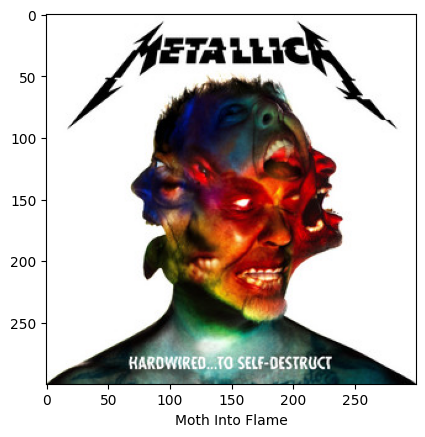

In [247]:
import matplotlib.pyplot as plt
from skimage import io

# encontrando o id da musica
nome_musica = 'Metallica - Moth Into Flame'
id = dfTotais[dfTotais['artists_song']==nome_musica]['id'].iloc[0]

# procurando imagem do album da musica
track = sp.track(id)
url = track["album"]["images"][1]["url"]
name = track["name"]
coisa = track["album"]

# exibindo a imagem
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize=10)
plt.show()

In [248]:
def recommend_id(playlist_id):
  url = []
  name = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])
  return name,url

In [249]:
name, url = recommend_id(recomendada['id'])
name,url

(['Moth Into Flame',
  'One More Sad Song',
  'Big Machine',
  'Survive',
  'Holiday / Boulevard of Broken Dreams'],
 ['https://i.scdn.co/image/ab67616d00001e02f2651ad6c2b8c509055f410e',
  'https://i.scdn.co/image/ab67616d00001e02eba2acd1d78fc80ed234af0b',
  'https://i.scdn.co/image/ab67616d00001e029923ca569ea4d53394c0146e',
  'https://i.scdn.co/image/ab67616d00001e0290fef039e01409cb5a8d560c',
  'https://i.scdn.co/image/ab67616d00001e0208a1b1e0674086d3f1995e1b'])

In [250]:
def visualize_songs(name, url):

  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
    ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
    image = io.imread(u)
    plt.imshow(image)
    ax.get_yaxis().set_visible(False)
    plt.xticks(color = 'w', fontsize = 0.1)
    plt.yticks(color = 'w', fontsize = 0.1)
    plt.xlabel(name[i], fontsize = 10)
    plt.tight_layout(h_pad=0.7, w_pad=0)
    plt.subplots_adjust(wspace=None, hspace=None)
    plt.grid(visible=None)
    plt.tick_params(bottom = False)
  plt.show()

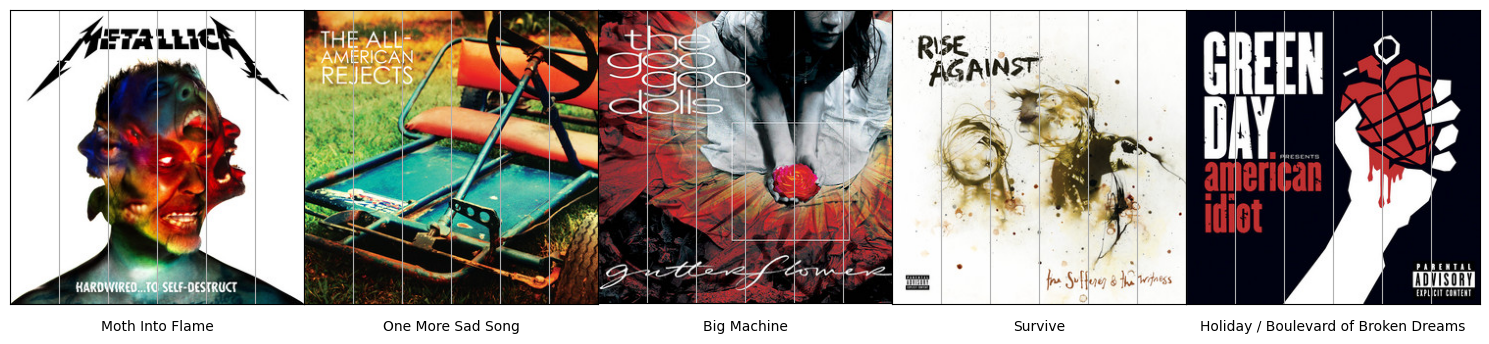

In [251]:
visualize_songs(name, url)

In [252]:
def recomendador(nome_musica):

  cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]

  recomended_songs = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]

  x_music = list(projection_m[projection_m['song']== nome_musica][0])[0]
  y_music = list(projection_m[projection_m['song']== nome_musica][1])[0]

  distances = euclidean_distances(recomended_songs[[0, 1]], [[x_music, y_music]])

  recomended_songs['id'] = dfTotais['id']
  recomended_songs['distances'] = distances

  recomendaded = recomended_songs.sort_values('distances').head(10)

  # Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendaded['id']

  name, url = recommend_id(recomendaded['id'])

  # Plotando as figuras
  visualize_songs(name, url)

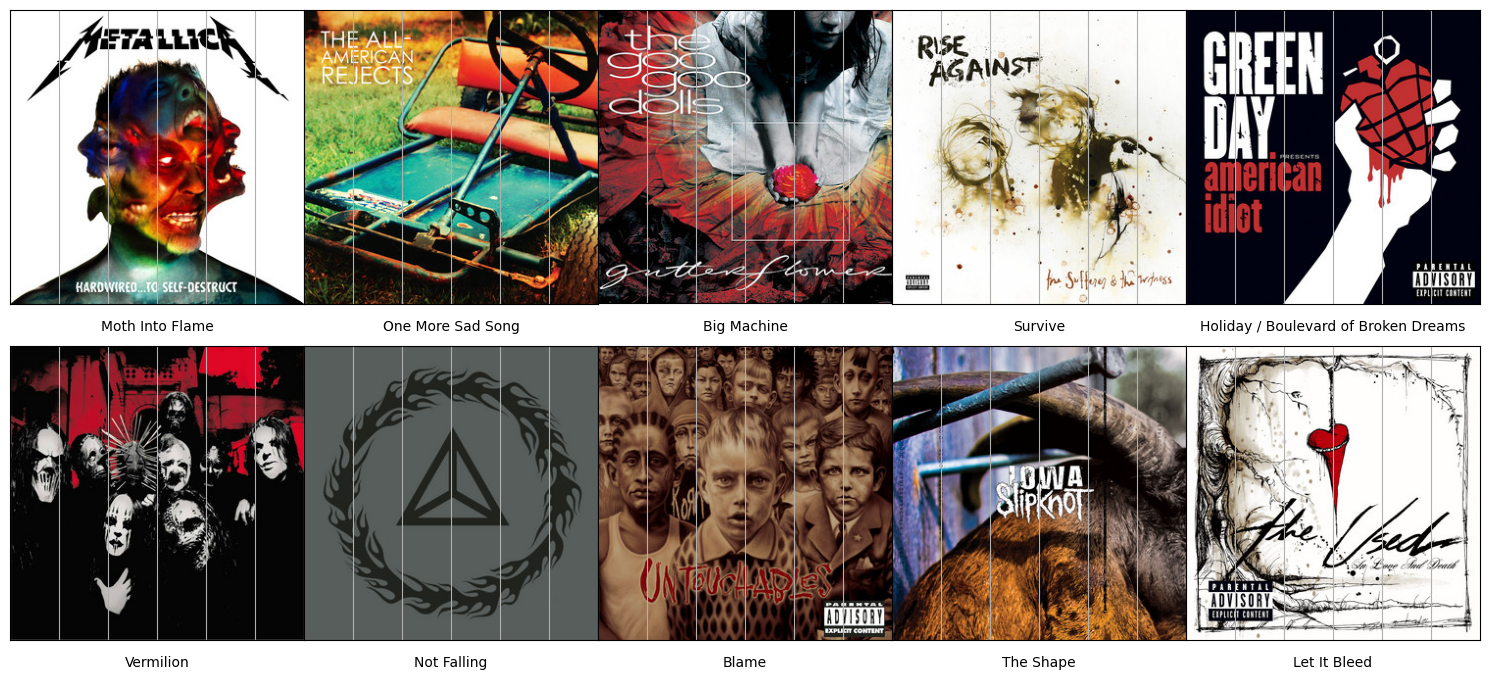

In [256]:
recomendador('Metallica - Moth Into Flame')

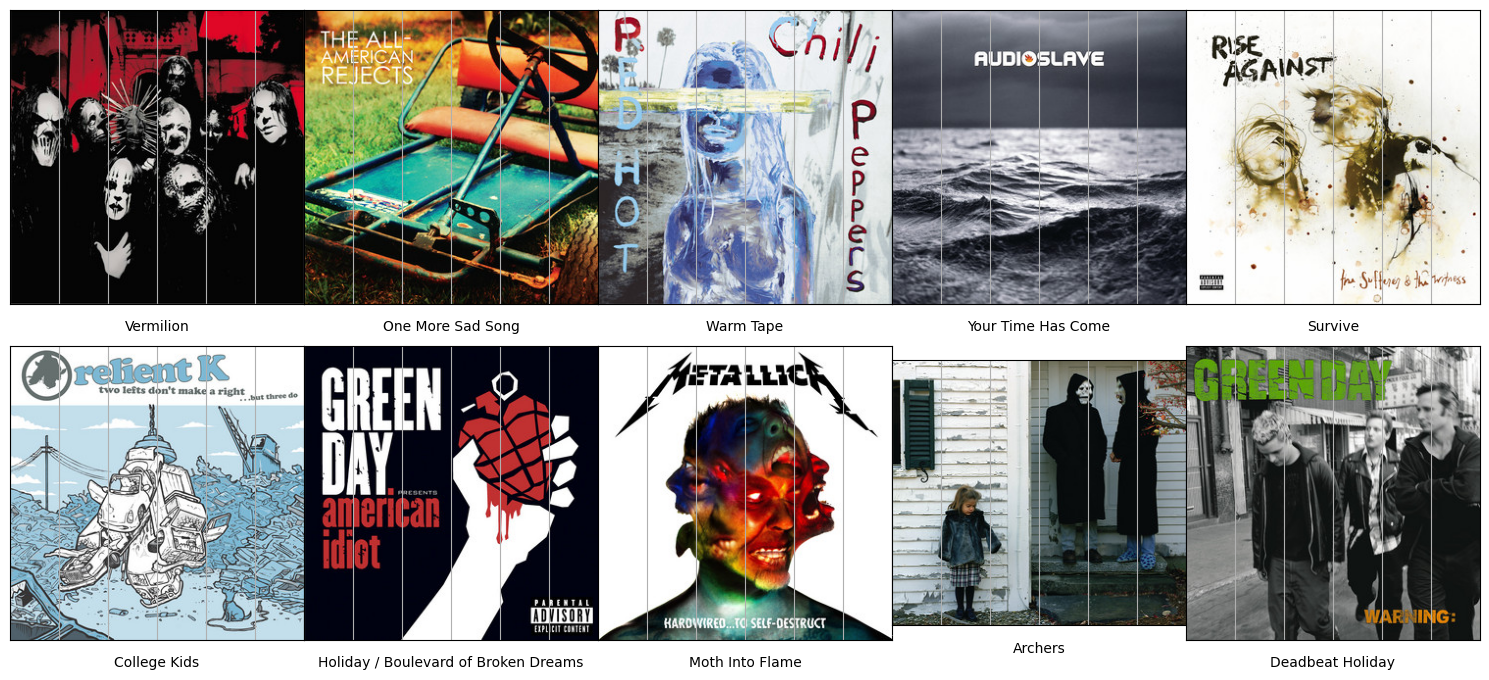

In [258]:
recomendador('Slipknot - Vermilion')

In [262]:
recomendador("Red Hot Chili Peppers - Can't Stop")

Output hidden; open in https://colab.research.google.com to view.